In [1]:
import numpy as np

a = [17, 21,  8, 20, 23, 18, 22, 20, 17, 12,
     20, 11,  9, 19, 20,  9, 19, 17, 21, 13,
     17, 22, 22, 10, 20, 20, 15, 19, 20, 20,
     13, 21, 21,  9, 14, 11, 19, 18, 23, 19]

an = np.array(a)
print(type(an))

<class 'numpy.ndarray'>


In [2]:
d = {}
r_elements = list(range(min(a), max(a) + 1))

for i in r_elements:
    d[i] = a.count(i)

Кількість елементів з відповідним значенням

In [3]:
d

{8: 1,
 9: 3,
 10: 1,
 11: 2,
 12: 1,
 13: 2,
 14: 1,
 15: 1,
 16: 0,
 17: 4,
 18: 2,
 19: 5,
 20: 8,
 21: 4,
 22: 3,
 23: 2}

абсолютні частоти з частковим інтервалом 1

In [4]:
d.values()

dict_values([1, 3, 1, 2, 1, 2, 1, 1, 0, 4, 2, 5, 8, 4, 3, 2])

абсолютні частоти з частковим інтервалом 2

In [5]:
print(list(d.values())[::2])
bb = np.array(list(d.values())[::2])
print(list(d.values())[1::2])
aa = np.array(list(d.values())[1::2])

[1, 1, 1, 1, 0, 2, 8, 3]
[3, 2, 2, 1, 4, 5, 4, 2]


In [6]:
Ni = []
for i in range(len(bb)):
    Ni.append(aa[i] + bb[i])
Ni

[4, 3, 3, 2, 4, 7, 12, 5]

In [7]:
c = aa + bb
c

array([ 4,  3,  3,  2,  4,  7, 12,  5])

NumPy абсолютні частоти з частковим інтервалом 2 

In [8]:
hist, bin_edges = np.histogram(an, bins=list(range(an.min(), an.max() + 2))[::2])
print(hist)
print(bin_edges)

[ 4  3  3  2  4  7 12  5]
[ 8 10 12 14 16 18 20 22 24]


Варіанти

In [9]:
sorted_by_second = [(n, min(n+2, an.max() + 1)) for n in range(an.min(), an.max() + 1, 2)]
sorted_by_second

[(8, 10), (10, 12), (12, 14), (14, 16), (16, 18), (18, 20), (20, 22), (22, 24)]

Відносні частоти

In [10]:
l_rel =[]
for i in c:
    l_rel.append(i / len(an))
l_rel
l_rel = np.array(l_rel)
print(l_rel)

[ 0.1    0.075  0.075  0.05   0.1    0.175  0.3    0.125]


Відносні накопичені частоти

In [11]:
cumulative_frequencies = np.cumsum(l_rel)
cumulative_frequencies

array([ 0.1  ,  0.175,  0.25 ,  0.3  ,  0.4  ,  0.575,  0.875,  1.   ])

In [12]:
print(len(hist))
print(hist)
print(len(l_rel))
print(len(cumulative_frequencies))
import pandas as pd
x = pd.DataFrame({'Варіанта': sorted_by_second, 'Абсолютні частоти': hist, 'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
print(x)

8
[ 4  3  3  2  4  7 12  5]
8
8
   Абсолютні частоти  Варіанта  Відносні частоти  Накопичені частоти
0                  4   (8, 10)             0.100               0.100
1                  3  (10, 12)             0.075               0.175
2                  3  (12, 14)             0.075               0.250
3                  2  (14, 16)             0.050               0.300
4                  4  (16, 18)             0.100               0.400
5                  7  (18, 20)             0.175               0.575
6                 12  (20, 22)             0.300               0.875
7                  5  (22, 24)             0.125               1.000


Сумма елементів списку

In [13]:
an.sum()

689

In [14]:
sum(a)

689

Сумма елементів списку піднесених до квадрату

In [15]:
np.square(an).sum()

12635

In [16]:
sum([i ** 2 for i in a])

12635

Серидини інтервалів

In [17]:
list(d.keys())[1::2]

[9, 11, 13, 15, 17, 19, 21, 23]

In [18]:
# Серидини інтервалів from tuple
from statistics import mean
avereges = []
for i in sorted_by_second:
    avereges.append(mean(i))
print(avereges)

import collections
avereges_absol = collections.OrderedDict(zip(avereges, Ni))
print(avereges_absol)
print(list(avereges_absol.values()))

[9, 11, 13, 15, 17, 19, 21, 23]
OrderedDict([(9, 4), (11, 3), (13, 3), (15, 2), (17, 4), (19, 7), (21, 12), (23, 5)])
[4, 3, 3, 2, 4, 7, 12, 5]


In [19]:
# Серидини інтервалів from list
lala = []
for i in range(1, len(bin_edges)):
    lala.append((bin_edges[i] + bin_edges[i - 1]) // 2)
print(lala)

[9, 11, 13, 15, 17, 19, 21, 23]


Варіанта з найбільшою частотою

In [20]:
greatest_frequency = max(avereges_absol, key=avereges_absol.get)
greatest_frequency

21

Ui

In [21]:
Ui = []
for i in avereges:
    Ui.append(int((1 / 2) * (i - greatest_frequency)))
print(Ui)

[-6, -5, -4, -3, -2, -1, 0, 1]


Ni * Ui

In [22]:
Uin = np.array(Ui)
Nin = np.array(Ni)
Nin_Uin = Nin * Uin
print(Nin_Uin)
print(Nin_Uin.sum())

[-24 -15 -12  -6  -8  -7   0   5]
-67


Ni * Ui^2

In [23]:
Nin_Uin_sq = Nin * np.square(Uin)
print(Nin_Uin_sq)
print(Nin_Uin_sq.sum())

[144  75  48  18  16   7   0   5]
313


Ni + (Ui + 1)^2

In [24]:
Nin * np.square(Uin + 1)

array([100,  48,  27,   8,   4,   0,  12,  20])

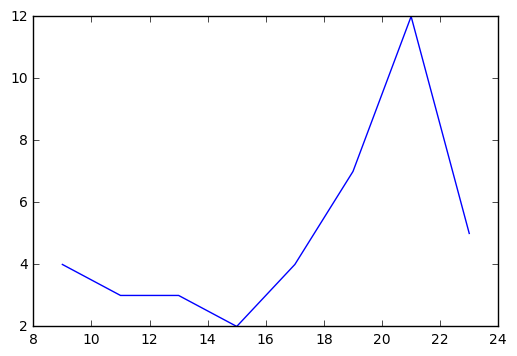

In [25]:
import matplotlib.pyplot as plt
plt.plot(avereges, Nin)
plt.show()

Незміщена оцінка дисперсії

In [26]:
from statistics import variance
print(variance((a)))
print(np.cov(an))

19.66602564102564
19.66602564102564


Середнє квадратичне відхилення

In [27]:
from statistics import pvariance
from math import sqrt
print(sqrt(pvariance((a))))
print(sqrt(np.var(an)))

4.378855444062981
4.37885544406298


In [32]:
import matplotlib.pyplot as plt 
plt.plot(avereges, cumulative_frequencies)
plt.show()

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[ 0.1    0.175  0.25   0.3    0.4    0.575  0.875  1.   ]
